# Camada ```Linear```

Vamos começar importando o módulo ```nn``` e o ```torch```

In [1]:
import torch
from torch import nn # neural networks

Agora vamos instanciar nossa camada linear, como vimos nos slides, com uma entrada de dimensionalidade ```d = 3``` e a saída de tamanho ```1```, já que estamos instanciando um perceptron simples. 

Qualquer dúvida, a documentação está logo ali ;)<br>
https://pytorch.org/docs/stable/nn.html#torch.nn.Linear

In [2]:
torch.manual_seed(42)

perceptron = nn.Linear(3, 1)
print(perceptron)

Linear(in_features=3, out_features=1, bias=True)


Temos em mãos exatamente o mesmo modelo da imagem clássica do perceptron!

<img src="https://drive.google.com/uc?export=view&id=1Ad1nKUG8ujVWysOauKYzOhhmR26Zl6yC" width="330">

Os pesos ```W``` e o viés ```b``` são inicializados aleatoriamente pelo pytorch. Podemos consultar essa informação de duas formas:
* iterando em seus **```named_parameters```**
* acessando cada parâmetro individualmente através do seu nome padrão.

In [3]:
for nome, tensor in perceptron.named_parameters():
  print(nome, tensor.data)
  
print('')
print(perceptron.weight.data)
print(perceptron.bias.data)

weight tensor([[ 0.4414,  0.4792, -0.1353]])
bias tensor([0.5304])

tensor([[ 0.4414,  0.4792, -0.1353]])
tensor([0.5304])


In [4]:
w1, w2, w3 = perceptron.weight.data.numpy()[0]
b = perceptron.bias.data.numpy()

# w1 * x1 + w2 * x2 + w3 * x3 + b = 0

É importante não se esquecer que no perceptron esses valores definem um hiperplano no espaço. Como 3 dimensões está no limite da nossa capacidade de visualização, vamos aproveitar esse momento para visualizar o plano aleatoriamente inicializado pelo ```torch```. 

Para isso, usaremos aqui a biblioteca de visualização matplotlib, com o toolkit de plot 3D.<br>
Mais informações em: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#mpl_toolkits.mplot3d.Axes3D.plot_surface

Para se inspirar: https://stackoverflow.com/questions/48335279/given-general-3d-plane-equation-how-can-i-plot-this-in-python-matplotlib

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(perceptron):
  
  w1, w2, w3 = perceptron.weight.data.numpy()[0]
  b = perceptron.bias.data.numpy()
  
  X1 = np.linspace(-1,1,10)
  X2 = np.linspace(-1,1,10)

  X1, X2 = np.meshgrid(X1,X2)

  X3 = (b - w1*X1 - w2*X2) / w3
  
  fig = plt.figure(figsize=(10, 8))

  ax = fig.add_subplot(projection='3d')
  ax.view_init(azim=180)
  
  ax.plot_surface(X1, X2, X3, cmap='plasma')
  

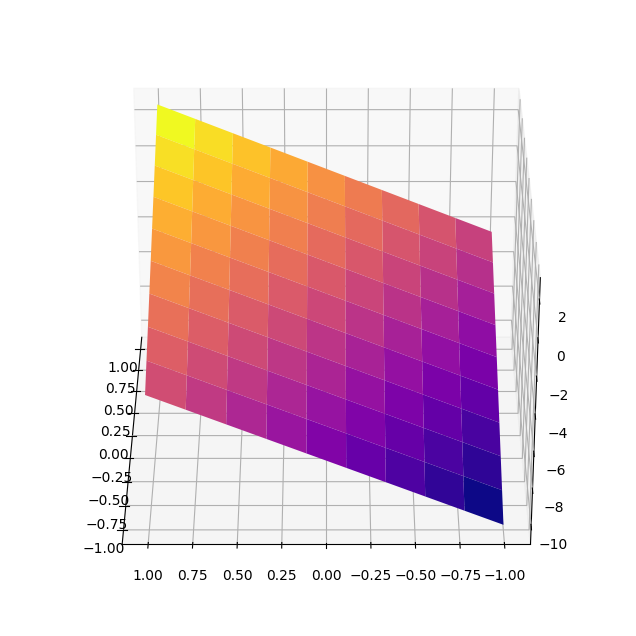

In [10]:
plot3d(perceptron)

## Forward
O fluxo da informação de entrada através da rede recebe o nome de *forward*, já que a informação é passada *para a frente*. Vamos então realizar o forward da nossa rede de um ~~homem~~ pereptron só. Para isso, basta realizar uma chamada de função com a variável onde instaciamos a camada ```Linear```.

```python
# Fizemos anteriormente a instância da camada
linear = nn.Linear(in_features=3, out_features=1)

# Para realizar o forward
y = linear(X)
```

tensor([0.7391], grad_fn=<ViewBackward0>)


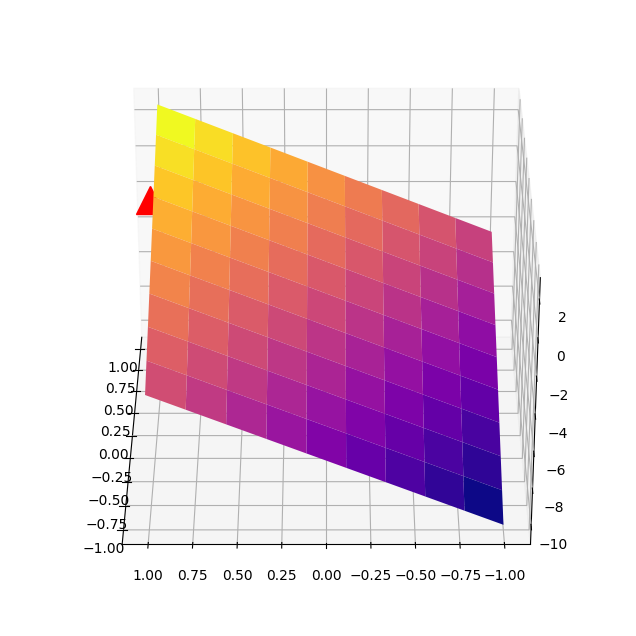

In [13]:
X = torch.Tensor([0, 1, 2])
y = perceptron(X)

print(y)

plot3d(perceptron)
plt.plot([X[0]], [X[1]], [X[2]], color='r', marker='^', markersize=20)